In [3]:
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
filename = '......../20200917_MGH_Broad_Villani_to_CZI.h5ad'
ann = sc.read(filename, backed=None, sheet=None, ext=None, delimiter=None, first_column_names=False, backup_url=None, cache=False)

In [7]:
#Covid dataset
covid = ann[ann.obs["covid"] == 1, :]
nocovid = ann[ann.obs["covid"] == 0, :]

In [8]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.7.1 anndata==0.7.5 umap==0.5.1 numpy==1.19.5 scipy==1.4.1 pandas==1.1.5 scikit-learn==0.22.2.post1 statsmodels==0.10.2 python-igraph==0.9.1 leidenalg==0.8.3


normalizing counts per cell
    finished (0:00:00)


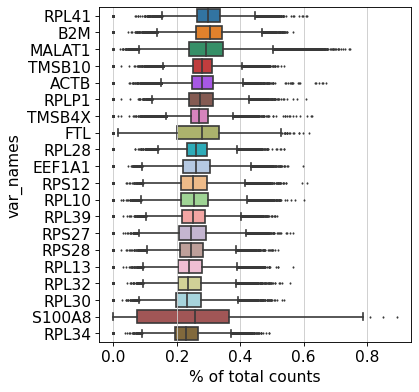

In [9]:
sc.pl.highest_expr_genes(ann, n_top=20, )

In [10]:
sc.pp.filter_cells(ann, min_genes=200)
sc.pp.filter_genes(ann, min_cells=3)

filtered out 2807 genes that are detected in less than 3 cells


In [11]:
ann.var['mt'] = ann.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(ann, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

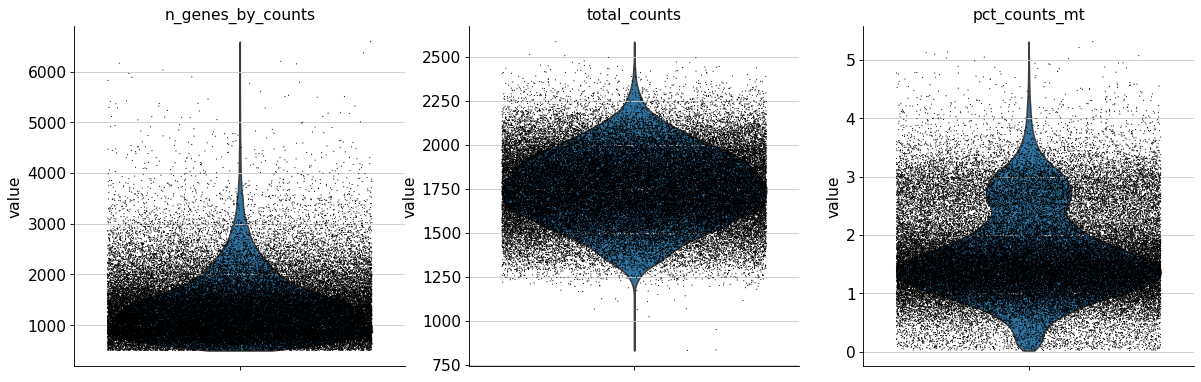

In [12]:
sc.pl.violin(ann, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

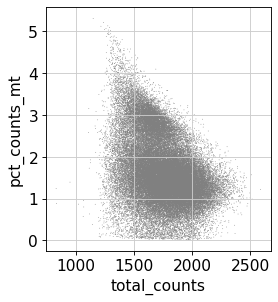

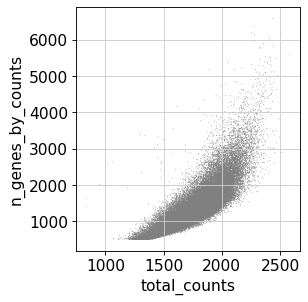

In [13]:
sc.pl.scatter(ann, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(ann, x='total_counts', y='n_genes_by_counts')

In [14]:
ann = ann[ann.obs.n_genes_by_counts < 2500, :]
ann = ann[ann.obs.pct_counts_mt < 5, :]

In [15]:
sc.pp.normalize_total(ann, target_sum=1e4)

/usr/local/lib/python3.7/dist-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
normalizing counts per cell
    finished (0:00:00)


In [16]:
sc.pp.log1p(ann)

In [17]:
sc.pp.highly_variable_genes(ann, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


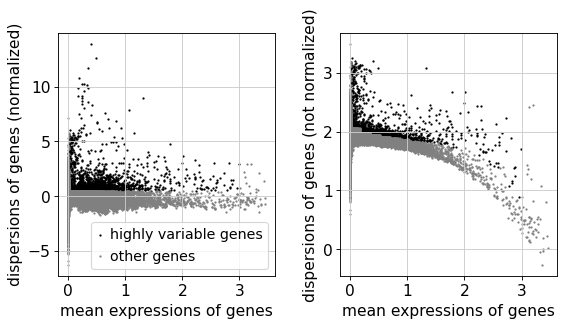

In [18]:
sc.pl.highly_variable_genes(ann)

In [19]:
ann.raw = ann

In [20]:
ann = ann[:, ann.var.highly_variable]

In [21]:
sc.pp.regress_out(ann, ['total_counts', 'pct_counts_mt'])

regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
    finished (0:02:02)


In [22]:
sc.pp.scale(ann, max_value=10)

In [23]:
sc.tl.pca(ann, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:22)


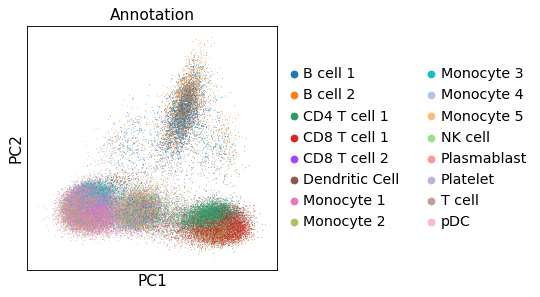

In [24]:
sc.pl.pca(ann, color='Annotation')

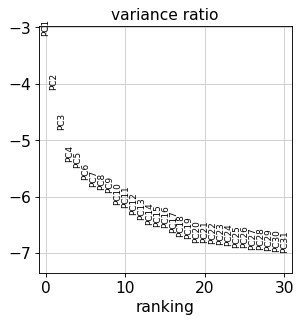

In [25]:
sc.pl.pca_variance_ratio(ann, log=True)

In [26]:
ann

AnnData object with n_obs × n_vars = 56284 × 1956
    obs: 'Institute', 'ObjectCreateDate', 'cluster', 'n_features', 'mito_pct', 'patient_id_with_time', 'Annotation', 'rank', 'patient_id', 'time_point', 'covid', 'age', 'bmi', 'heart', 'lung', 'kidney', 'diabetes', 'pre_existing_hypertension', 'immunocompromised_conditions', 'resp_symp', 'fever_sympt', 'gi_sympt', 'who_0', 'who_3', 'who_7', 'who_28', 'who_max', 'trop_72h', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'Annotation_colors'
    obsm: 'X_umap', 'X_pca'
    varm: 'PCs'

In [27]:
sc.pp.neighbors(ann) 

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:30)


In [28]:
sc.tl.umap(ann,)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:01:21)


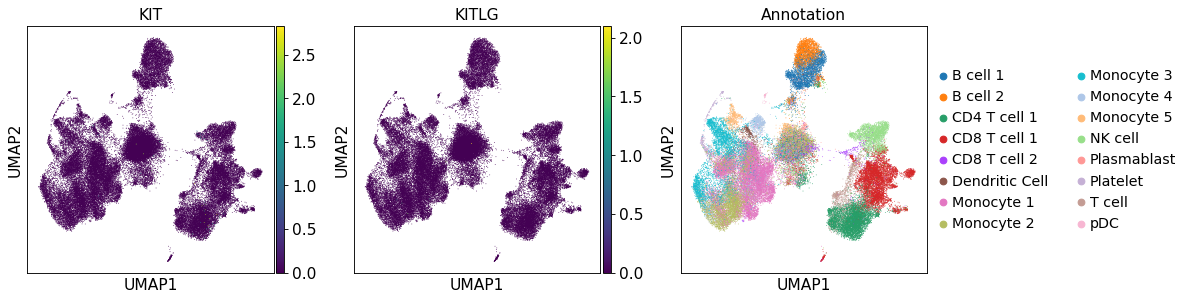

In [29]:
sc.pl.umap(ann, color=['KIT', 'KITLG', 'Annotation'], save='MGHall.svg')

Clustering the neighborhood graph

In [31]:
sc.tl.leiden(ann)

running Leiden clustering
    finished: found 21 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:15)


running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:03)
--> added 'pos', the PAGA positions (adata.uns['paga'])


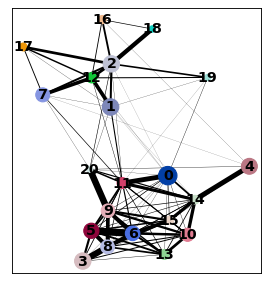

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:01:16)


In [32]:
sc.tl.paga(ann)
sc.pl.paga(ann, )  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(ann, init_pos='paga' )

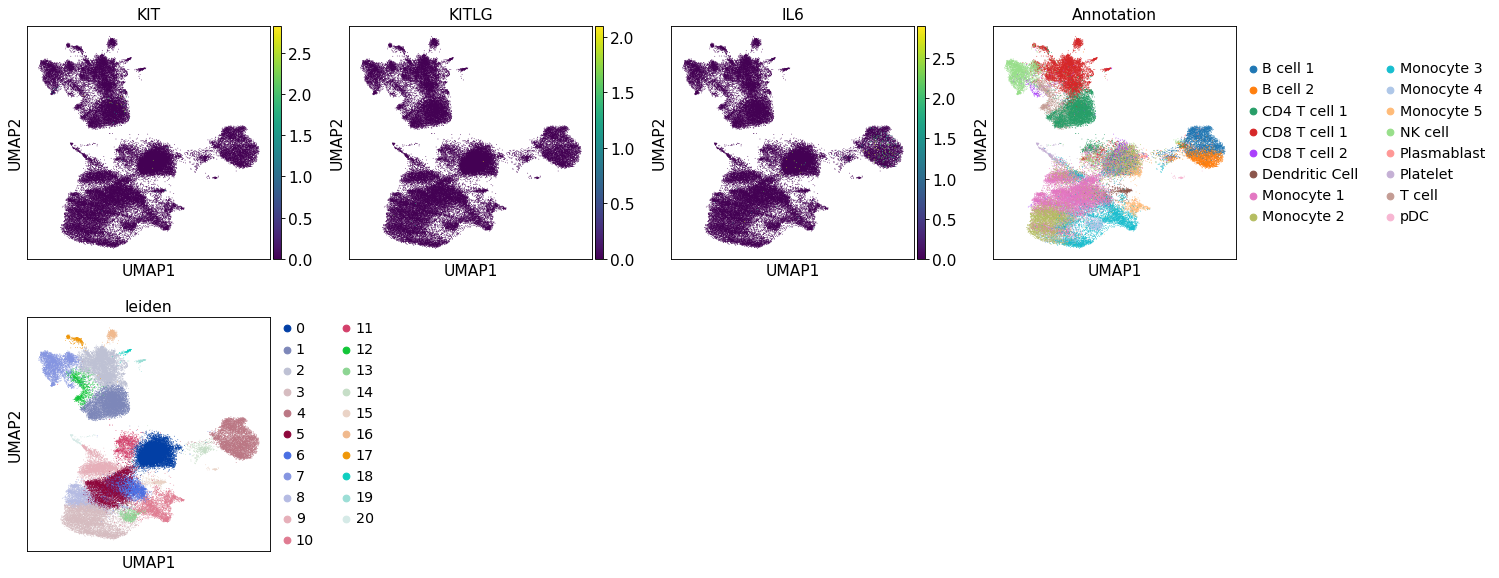

In [33]:
sc.pl.umap(ann, color= ['KIT', 'KITLG', 'IL6', 'Annotation', 'leiden'])

**Finding marker genes**
ranking for the highly differential genes in each cluster

In [34]:
sc.settings.verbosity = 2  # reduce the verbosity

In [ ]:
ann = ann[ann.obs["covid"].replace({1:'positive', 0: 'negative'},  inplace =True) , :]

ranking genes
... storing 'covid' as categorical
    finished (0:01:50)


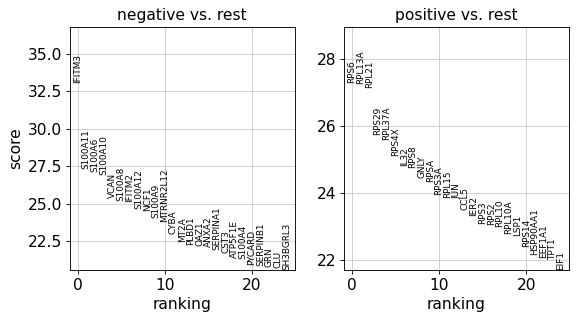

In [36]:
#Wilcoxon rank-sum (Mann-Whitney-U) test

sc.tl.rank_genes_groups(ann, 'covid', method='wilcoxon')
sc.pl.rank_genes_groups(ann, n_genes=25, sharey=False)

In [37]:
#10 top ranked genes per cluster

pd.DataFrame(ann.uns['rank_genes_groups']['names']).head(5)

,negative,positive
0,IFITM3,RPS6
1,S100A11,RPL13A
2,S100A6,RPL21
3,S100A10,RPS29
4,VCAN,RPL37A


In [38]:
result = ann.uns['rank_genes_groups']
groups = result['names'].dtype.names
expr = pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']})

In [39]:
names  =[]
pvals = []
pvals_adj = []
logFC = []

for i in range(len(result['names'])):
  for name in result['names'][i]:
      names.append(name)
  for pval in result['pvals'][i]:
      pvals.append(pval)
  for pval_adj in result['pvals_adj'][i]:
      pvals_adj.append(pval_adj)
  for fc in result['logfoldchanges'][i]:
      logFC.append(fc)

wilcoxon = pd.DataFrame(
    {'genes': names,
     'pvals': pvals,
     'pvals_adj': pvals_adj,
     'logFC': logFC
    })


In [40]:
wilcoxon[wilcoxon['genes'].isin(['KIT', 'KITLG'] )]

,genes,pvals,pvals_adj,logFC
16953,KIT,0.950235,1.0,20.554935
17792,KITLG,0.993505,1.0,-17.412779
24751,KITLG,0.993505,1.0,17.412779
25784,KIT,0.950235,1.0,-20.554935


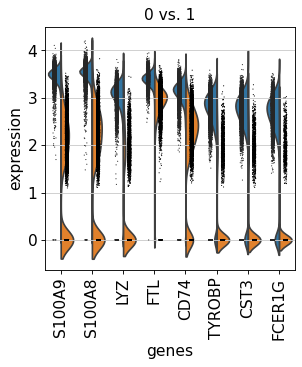

In [42]:
sc.pl.rank_genes_groups_violin(ann, groups='0', n_genes=8)

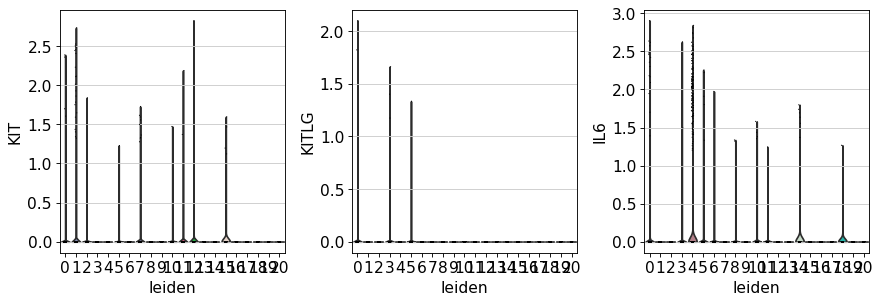

In [44]:
sc.pl.violin(ann, ['KIT', 'KITLG', 'IL6'], groupby='leiden')

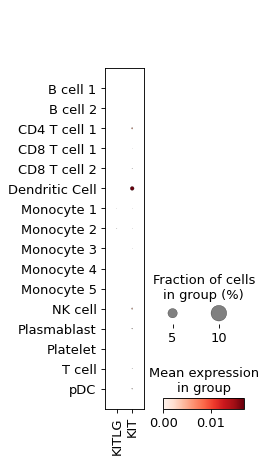

In [46]:
marker_genes = ['KITLG', 'KIT']
sc.pl.dotplot(covid, marker_genes, groupby='Annotation', save='covid.svg')

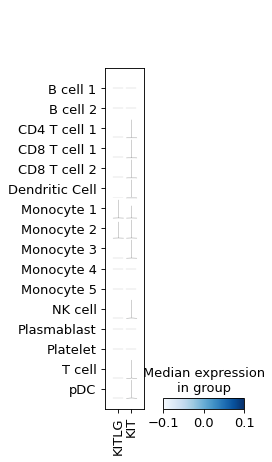

In [47]:
sc.pl.stacked_violin(ann, marker_genes, groupby='Annotation', rotation=90, save='covid.svg')